# Pyspark
PySpark is an interface for Apache Spark in Python. It not only allows you to write Spark applications using Python APIs, but also provides the PySpark shell for interactively analyzing your data in a distributed environment. PySpark supports most of Spark’s features such as Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) and Spark Core.

# How Partitions works in Pyspark
Spark/PySpark partitioning is a way to split the data into multiple partitions so that you can execute transformations on multiple partitions in parallel which allows completing the job faster. You can also write partitioned data into a file system (multiple sub-directories) for faster reads by downstream systems.

We have two different ways of partitioning:
1. repartition.
2. partitionby

**For understanding the partitioning concept lets create the entry point of spark application.**

## Here We are Discussing the example with the help of <code>LOCAL</code> mode.

When you running on local in standalone mode, Spark partitions data into the number of CPU cores you have on your system or the value you specify at the time of creating SparkSession object.

In [20]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
        .appName("PartitionExample.com") \
        .master("local[4]") \
        .getOrCreate()

The above example provides local[4] as an argument to master() method meaning to run the job locally with 4 partitions. Though if you have just 2 cores on your system, it still creates 4 partition tasks.

To understand the concept lets read the csv file and see the no of partitions.

In [25]:
df = spark.range(0,20)
df.rdd.getNumPartitions()

8

As you can see from the above example there are total 8 partitions.
why 8 partitions ?
Because I have 8 cores in my machine that is why it is by default creating 8 partitions.

### How it will work for a file that we saved in our system.
Read the file from the location and check the number of partitions.

In [26]:
df_file = spark.read.csv("../Data/spacex_launches.csv", header=True, inferSchema=True)

Now check the partitions for this file.

In [27]:
df_file.rdd.getNumPartitions()

1

As you are aware Spark is designed to process large datasets 100x faster than traditional processing, this wouldn’t have been possible without partitions. Below are some of the advantages of using Spark partitions on memory.

Fast accessed to the data.

Provides the ability to perform an operation on a smaller dataset.

**Here we are getting only 1 partition for csv file. Because the file is saved on local system, But in distributed environment the files are not stored like this.**
If file is stored in HDFS cluster then how it should load the data and create logical in-memory DATAFRAME.
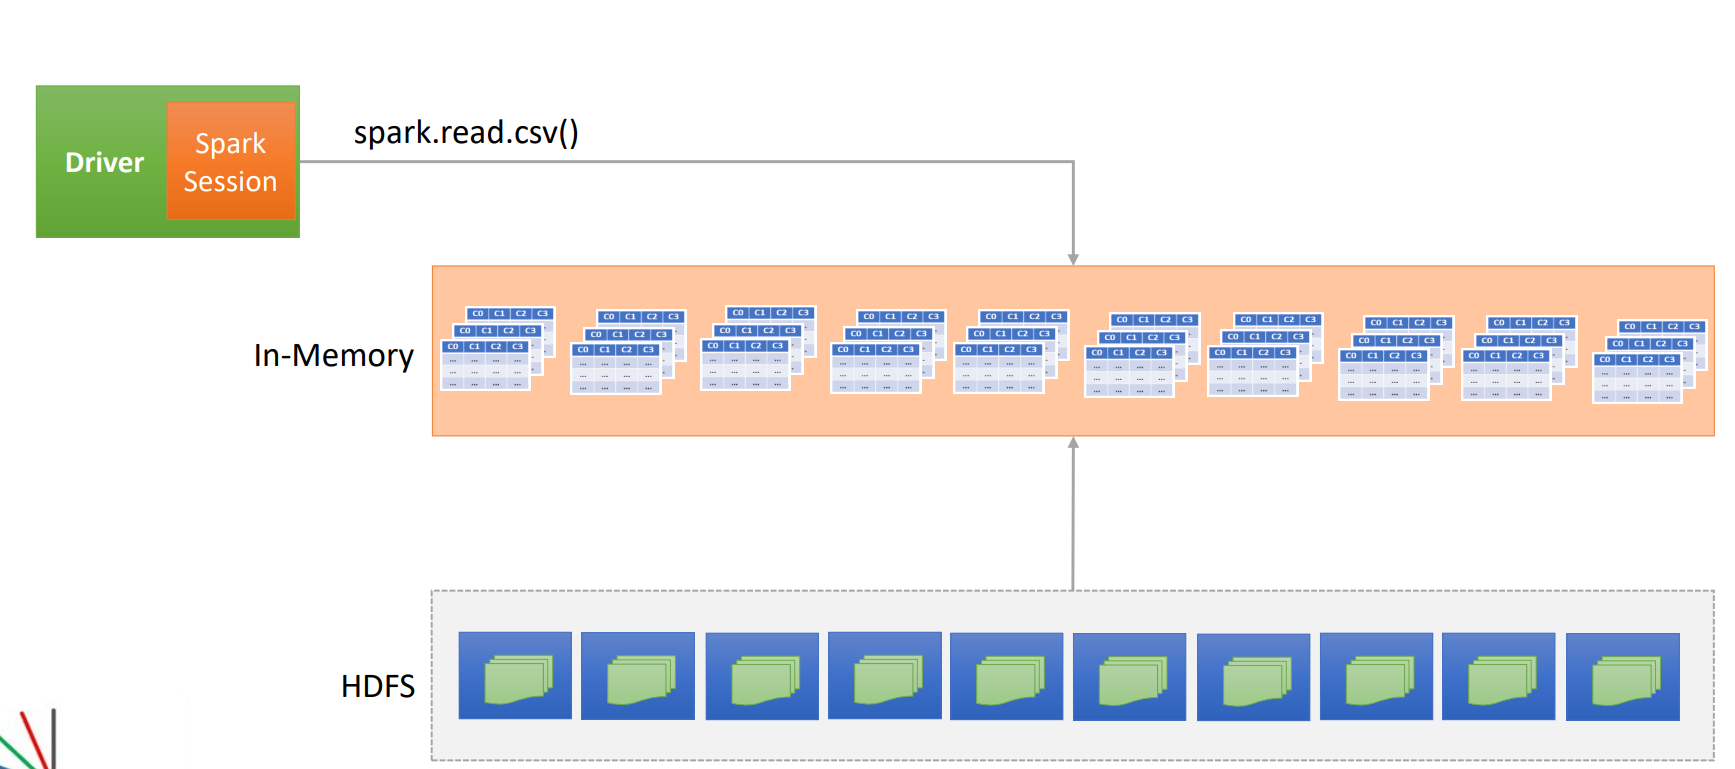

After reading the file for parallel exections different executers will get the data partitions and the operations what we want to perform on data.

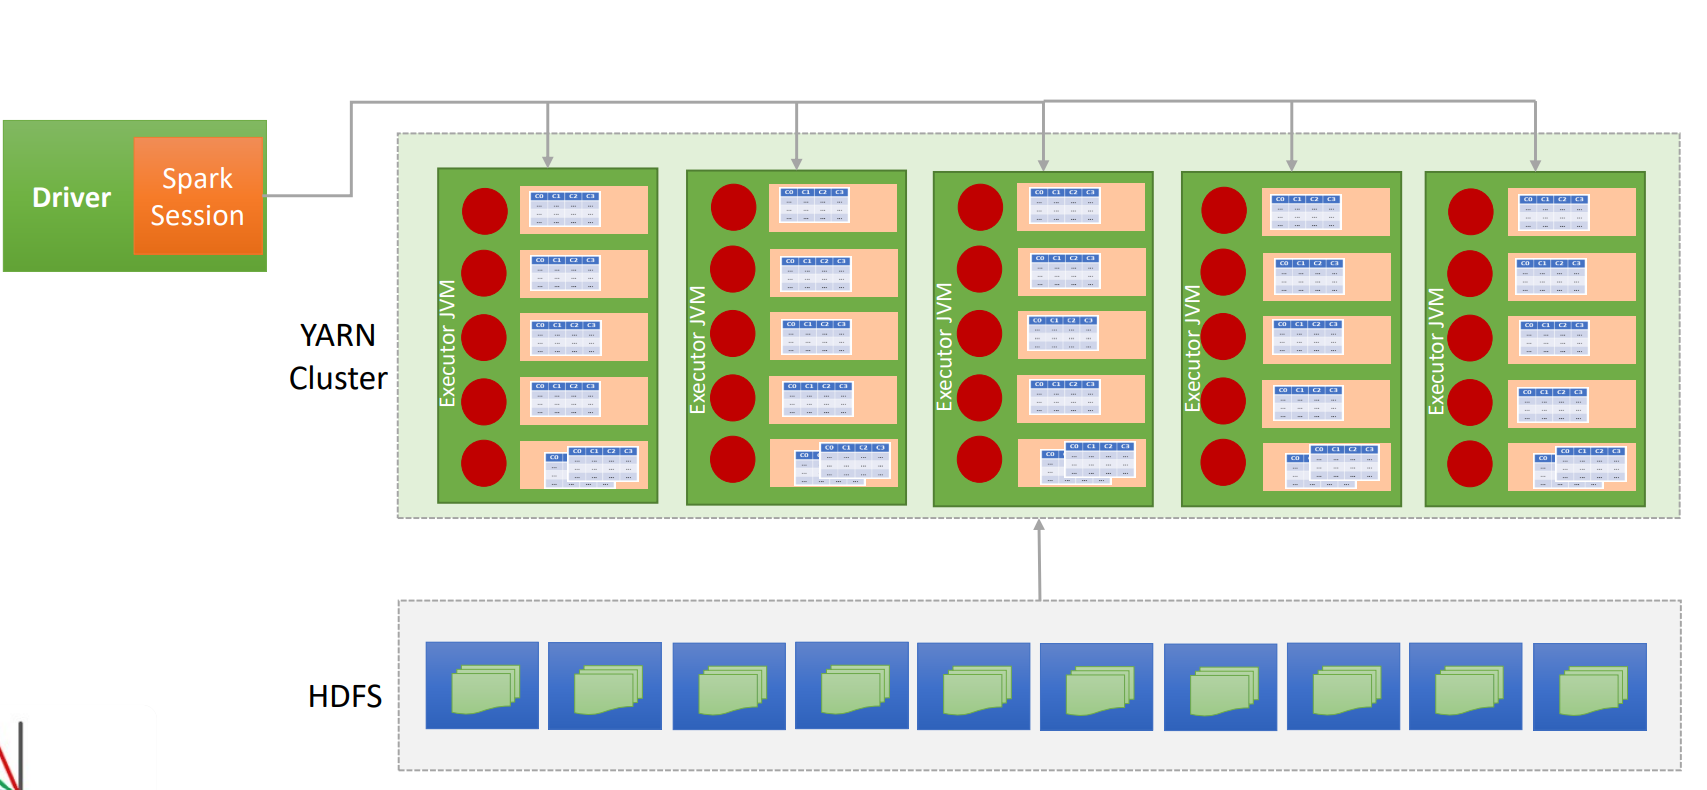

In the above image you can see that we have given the data partitions to the executers depending on the capacity that we have for the executers.

## Partitioning the DataFrame Manually to achieve the parallelism.

You can partition or repartition the DataFrame by calling repartition() or coalesce() transformations.

In [28]:
df_file = df_file.repartition(5)
df_file.rdd.getNumPartitions()

5

**This is called In Memory Partitioning where i have created the partition manually Now we can perform the different transformations on each partition in parallel manner.**